In [1]:
import pandas as pd
import pyspark

In [ ]:
# Basic Datframe Exploration

In [2]:
df = pd.read_csv(r'C:\Users\albin\Downloads/Inventory.csv')

In [69]:
df.head()

,Inventory Item,Number in Stock
0,0,0
1,beverages,30
2,pizza,68
3,burgeer,36
4,soft drinks,26


In [70]:
df.tail()

,Inventory Item,Number in Stock
3,burgeer,36
4,soft drinks,26
5,pet food,67
6,Grocery,25
7,Fuel,66


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inventory Item   7 non-null      object 
 1   Number in Stock  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 260.0+ bytes


In [ ]:
df= df.astype(int)

In [66]:
df = df.fillna(0)

In [67]:
df['Number in Stock'] = df['Number in Stock'].astype(int)

In [8]:
df.shape

(8, 2)

In [68]:
df.describe()

,Number in Stock
count,8.000000
mean,39.750000
std,24.858169
min,0.000000
25%,25.750000
50%,33.000000
75%,66.250000
max,68.000000


In [9]:
df.columns

Index(['Inventory Item', 'Number in Stock'], dtype='object')

In [ ]:
#DATA SELECTION

In [15]:
df['Inventory Item']

0            NaN
1      beverages
2          pizza
3        burgeer
4    soft drinks
5       pet food
6        Grocery
7           Fuel
Name: Inventory Item, dtype: object

In [19]:
df['Number in Stock']

0     NaN
1    30.0
2    68.0
3    36.0
4    26.0
5    67.0
6    25.0
7    66.0
Name: Number in Stock, dtype: float64

In [21]:
df[['Inventory Item','Number in Stock']]

,Inventory Item,Number in Stock
0,NaN,NaN
1,beverages,30.0
2,pizza,68.0
3,burgeer,36.0
4,soft drinks,26.0
5,pet food,67.0
6,Grocery,25.0
7,Fuel,66.0


In [22]:
df.iloc[1:5]

,Inventory Item,Number in Stock
1,beverages,30.0
2,pizza,68.0
3,burgeer,36.0
4,soft drinks,26.0


In [28]:
df[df['Number in Stock'] >40]

,Inventory Item,Number in Stock
2,pizza,68.0
5,pet food,67.0
7,Fuel,66.0


In [ ]:
# DATA CLEANING 

In [29]:
df.isnull().sum()

Inventory Item     1
Number in Stock    1
dtype: int64

In [30]:
df_cleaned = df.dropna()

In [31]:
df_filled = df.fillna(0)

In [32]:
df_no_duplicates = df.drop_duplicates()

In [ ]:
# DATA MANIPULATON

In [38]:
df.sort_values('Number in Stock', ascending=True)

,Inventory Item,Number in Stock
6,Grocery,25.0
4,soft drinks,26.0
1,beverages,30.0
3,burgeer,36.0
7,Fuel,66.0
5,pet food,67.0
2,pizza,68.0
0,NaN,NaN


In [ ]:
df[df['Inventory Item'] > 50])

In [ ]:
df.groupby('Number in Stock').mean()

In [ ]:
# DATA VISUALISATION

In [49]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

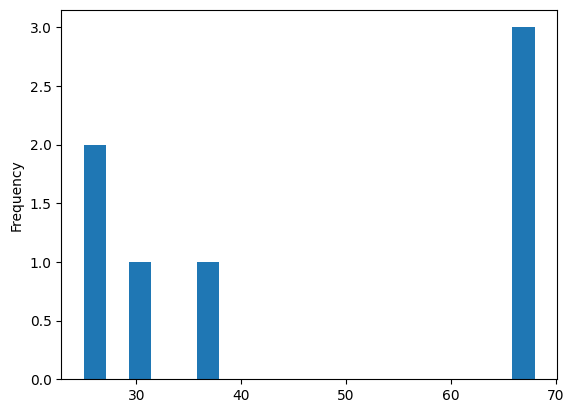

In [61]:
df['Number in Stock'].plot(kind='hist',bins=20)

Text(0.5, 1.0, 'Histogram of Stock')

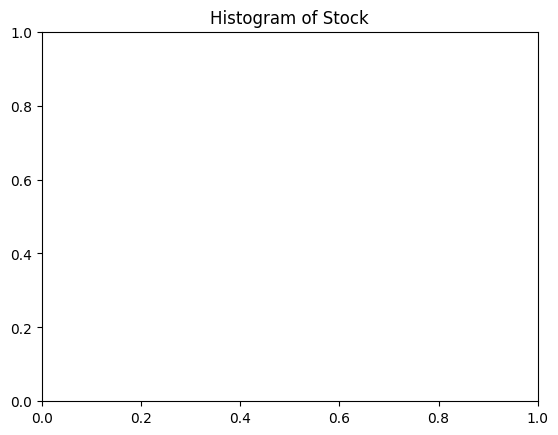

In [55]:
plt.title('Histogram of Stock')

In [57]:
plt.show()

<Axes: xlabel='Inventory Item'>

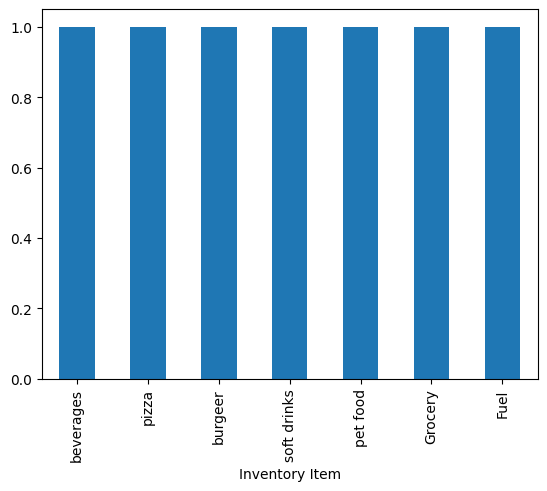

In [58]:
df['Inventory Item'].value_counts().plot(kind='bar')

In [59]:
plt.show()

In [ ]:
# convert strings to numeric data for x axis

In [75]:
df['Inventory Item'] = pd.factorize(df['Inventory Item'])[0] 

<Axes: xlabel='Inventory Item', ylabel='Number in Stock'>

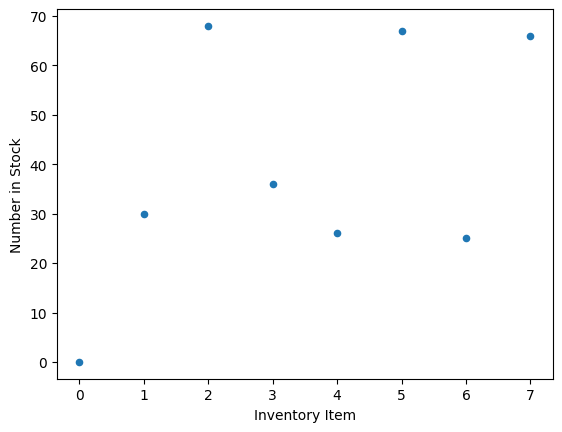

In [76]:
df.plot(kind='scatter', y='Number in Stock',x='Inventory Item')

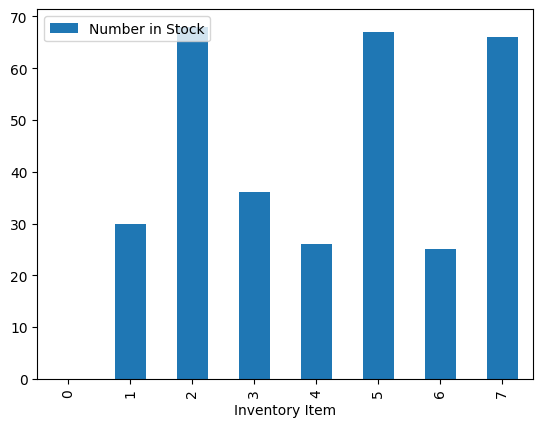

In [78]:
df.plot(kind='bar',x='Inventory Item',y ='Number in Stock')
plt.show()

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark =SparkSession.builder \
.appName("Practise") \
.master("local [*]") \
.getOrCreate()